# EarthMIP Trial

**Installation**

* [apex](https://github.com/NVIDIA/apex#quick-start)

In [1]:
import autoroot
import datetime
from earth2mip import inference_ensemble, registry
from earth2mip.networks import get_model
from earth2mip.initial_conditions import cds
from earth2mip.inference_ensemble import run_basic_inference
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Model

In [2]:
model_name = "fcnv2_sm" # "fcn" # 
model = f"e2mip://{model_name}"
device = "cuda:0"

In [3]:
time_loop  = get_model(
    model=model,
    device=device,
)

Look at the channel names, this will be important later on...

In [4]:
time_loop.in_channel_names

['u10m',
 'v10m',
 'u100m',
 'v100m',
 't2m',
 'sp',
 'msl',
 'tcwv',
 'u50',
 'u100',
 'u150',
 'u200',
 'u250',
 'u300',
 'u400',
 'u500',
 'u600',
 'u700',
 'u850',
 'u925',
 'u1000',
 'v50',
 'v100',
 'v150',
 'v200',
 'v250',
 'v300',
 'v400',
 'v500',
 'v600',
 'v700',
 'v850',
 'v925',
 'v1000',
 'z50',
 'z100',
 'z150',
 'z200',
 'z250',
 'z300',
 'z400',
 'z500',
 'z600',
 'z700',
 'z850',
 'z925',
 'z1000',
 't50',
 't100',
 't150',
 't200',
 't250',
 't300',
 't400',
 't500',
 't600',
 't700',
 't850',
 't925',
 't1000',
 'r50',
 'r100',
 'r150',
 'r200',
 'r250',
 'r300',
 'r400',
 'r500',
 'r600',
 'r700',
 'r850',
 'r925',
 'r1000']

In [5]:
# initial condition
data_source = cds.DataSource(time_loop.in_channel_names)
# starting timestep
t0 = datetime.datetime(2021,8,1)
# number of forecast steps
num_steps = 10 # 6h intervals

In [6]:
%%time
ds = run_basic_inference(
    time_loop, 
    n=num_steps, 
    data_source=data_source, 
    time=t0
)

CPU times: user 4.41 s, sys: 4.27 s, total: 8.67 s
Wall time: 8.74 s


In [7]:
ds.chunk()

<xarray.DataArray (time: 11, history: 1, channel: 73, lat: 721, lon: 1440)> Size: 3GB
dask.array<xarray-<this-array>, shape=(11, 1, 73, 721, 1440), dtype=float32, chunksize=(11, 1, 73, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * channel  (channel) <U5 1kB 'u10m' 'v10m' 'u100m' ... 'r850' 'r925' 'r1000'
  * time     (time) datetime64[ns] 88B 2021-08-01 ... 2021-08-03T12:00:00
Dimensions without coordinates: history

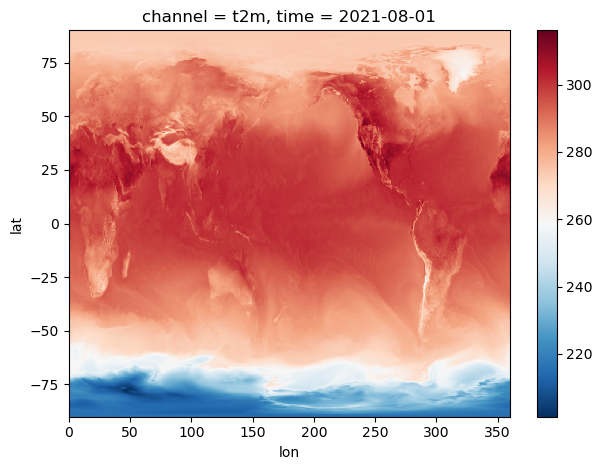

In [8]:
fig, ax = plt.subplots()
ds.sel(channel="t2m").isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap="RdBu_r")
plt.tight_layout()
plt.show()

In [9]:
# from pathlib import Path

# save_dir = Path("/pool/proyectos/CLINT/temp/sa4attrs/data/pred/earth2mip")
# save_name = f"{model_name.replace('_','')}"
# save_name += f"-{str(t0.date()).replace('-','')}"
# save_name += ".nc"
# save_name = save_name.replace('-','_')
# ds.to_netcdf(save_dir.joinpath(save_name))